In [4]:
input_dir = 'input/'

In [22]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [38]:
data = pd.read_csv(input_dir+'bank-additional-full.csv', header=0, sep=';')

In [39]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [40]:
data.shape

(41188, 21)

In [41]:
data.dropna(inplace=True)

In [42]:
data.shape

(41188, 21)

In [43]:
data.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree', 'illiterate'], dtype=object)

In [44]:
data['education'] = data['education'].apply(lambda x: 'basic' if x == 'basic.4y' or x == 'basic.6y' or x == 'basic.9y' else x)

In [45]:
data.education.unique()

array(['basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

In [46]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [47]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086


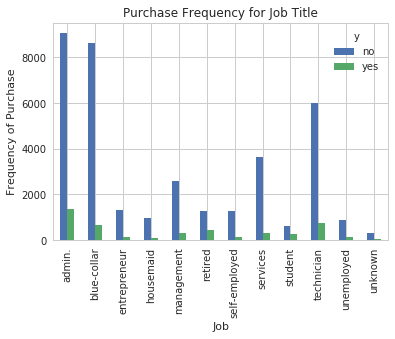

In [48]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

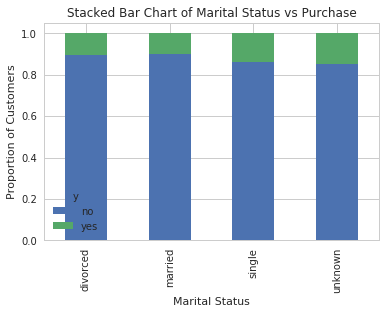

In [49]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

### (exp) get_dummies 

In [51]:
data['job'][:10]

0      housemaid
1       services
2       services
3         admin.
4       services
5       services
6         admin.
7    blue-collar
8     technician
9       services
Name: job, dtype: object

In [52]:
pd.get_dummies(data['job'].iloc[:10]) # think get_dummies as onehotencoder that can work on strings 

,admin.,blue-collar,housemaid,services,technician
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,0,1,0
5,0,0,0,1,0
6,1,0,0,0,0
7,0,1,0,0,0
8,0,0,0,0,1
9,0,0,0,1,0


### (exp) instead of get_dummies, you can label encoding 'job' then onehotencoder to get the same results

In [57]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

tempdf = data.head(10).copy()

lencoder = LabelEncoder()

tempdf['job'] = lencoder.fit_transform(tempdf['job'])

tempdf.head()

encoder = OneHotEncoder()

tempdf['job'].values.reshape(-1,1).shape

newjob = encoder.fit_transform(tempdf['job'].values.reshape(-1,1))

In [72]:
newjob.todense()

matrix([[ 0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  1.,  0.],
        [ 1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  1.,  0.],
        [ 1.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  1.,  0.]])

### =========================================================

In [50]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']

In [77]:
for var in cat_vars:
    cat_list = pd.get_dummies(data[var], prefix=var)
    data=data.join(cat_list)

In [78]:
data.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,basic,no,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,0,0,0,1,0,0,0,0,1,0


In [80]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', '

In [82]:
data.drop(cat_vars, axis=1, inplace=True)

In [85]:
assert len([col for col in cat_vars if col in data.columns]) == 0 # make sure these original category columns are dropped

In [86]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [87]:
logreg = LogisticRegression()

In [88]:
rfe = RFE(logreg, 18)

In [89]:
rfe.fit(data.drop('y', axis=1), data.y)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
  n_features_to_select=18, step=1, verbose=0)

In [90]:
rfe.support_

array([False, False, False, False,  True, False, False, False,  True,
       False, False,  True, False, False, False,  True, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False,  True,  True,
       False, False, False,  True,  True,  True, False, False, False,
        True, False, False, False,  True,  True,  True], dtype=bool)

In [91]:
rfe.ranking_

array([35, 33, 13, 41,  1, 14, 17, 18,  1, 27, 12,  1, 26, 40, 42,  1, 32,
        1,  1, 21, 22, 39,  7,  8,  9, 43,  1,  2, 38,  3,  4,  5,  1, 16,
       44, 36, 29, 37, 19, 31, 28,  1, 15,  1,  1, 20, 23, 24,  1,  1,  1,
       30, 10, 11,  1, 34, 25,  6,  1,  1,  1])

In [102]:
chosen_cols = [pair[1] for pair in zip(rfe.support_, data.columns) if pair[0]] 

In [109]:
chosen_cols

['previous',
 'euribor3m',
 'job_admin.',
 'job_management',
 'job_self-employed',
 'job_services',
 'marital_unknown',
 'education_unknown',
 'loan_yes',
 'contact_telephone',
 'month_apr',
 'month_jun',
 'month_mar',
 'month_may',
 'day_of_week_fri',
 'day_of_week_wed',
 'poutcome_failure',
 'poutcome_nonexistent']

In [106]:
data[chosen_cols].values

array([[ 0.   ,  4.857,  0.   , ...,  0.   ,  0.   ,  1.   ],
       [ 0.   ,  4.857,  0.   , ...,  0.   ,  0.   ,  1.   ],
       [ 0.   ,  4.857,  0.   , ...,  0.   ,  0.   ,  1.   ],
       ..., 
       [ 0.   ,  1.028,  0.   , ...,  0.   ,  0.   ,  1.   ],
       [ 0.   ,  1.028,  0.   , ...,  0.   ,  0.   ,  1.   ],
       [ 1.   ,  1.028,  0.   , ...,  0.   ,  1.   ,  0.   ]])

import statsmodels.api as sm
logit_model=sm.Logit(data.y.values,data[chosen_cols].values)
result=logit_model.fit()
print(result.summary())

In [110]:
X_train, X_test, y_train, y_test = train_test_split(data[chosen_cols], data.y, test_size=0.25, random_state=42)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [111]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.90
